In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/photon1/users/labsaha/usr/users/labsaha/miniconda3_1/envs/joint-crab/bin/python
3.6.0 | packaged by conda-forge | (default, Feb  9 2017, 14:36:55) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
sys.version_info(major=3, minor=6, micro=0, releaselevel='final', serial=0)


In [37]:
import sys
from joint_crab import config

In [44]:
import matplotlib
%matplotlib inline
import numpy as np
import naima
import astropy.units as u
from astropy.io import ascii
import matplotlib.pyplot as plt
from gammapy.spectrum import models


In [45]:
import glob   # to list files
from sherpa.astro.datastack import DataStack
from gammapy.datasets import gammapy_extra
import sherpa.astro.datastack as sh

ANALYSIS_DIR = '/photon1/users/labsaha/joint-crab/data'

ds = DataStack()
pha_list1 = glob.glob(ANALYSIS_DIR + '/magic/ogip-spectra/pha_obs*.fits')
pha_list2 = glob.glob(ANALYSIS_DIR + '/hess/ogip-spectra/pha_obs*.fits')
pha_list = pha_list1 + pha_list2

for pha in pha_list:
    sh.load_data(ds,pha)

read ARF file /photon1/users/labsaha/joint-crab/data/magic/ogip-spectra/arf_obs5029747.fits
read RMF file /photon1/users/labsaha/joint-crab/data/magic/ogip-spectra/rmf_obs5029747.fits
read background file /photon1/users/labsaha/joint-crab/data/magic/ogip-spectra/bkg_obs5029747.fits
read ARF file /photon1/users/labsaha/joint-crab/data/magic/ogip-spectra/arf_obs5029748.fits
read RMF file /photon1/users/labsaha/joint-crab/data/magic/ogip-spectra/rmf_obs5029748.fits
read background file /photon1/users/labsaha/joint-crab/data/magic/ogip-spectra/bkg_obs5029748.fits
read ARF file /photon1/users/labsaha/joint-crab/data/hess/ogip-spectra/arf_obs23523.fits
read RMF file /photon1/users/labsaha/joint-crab/data/hess/ogip-spectra/rmf_obs23523.fits
read background file /photon1/users/labsaha/joint-crab/data/hess/ogip-spectra/bkg_obs23523.fits
read ARF file /photon1/users/labsaha/joint-crab/data/hess/ogip-spectra/arf_obs23526.fits
read RMF file /photon1/users/labsaha/joint-crab/data/hess/ogip-spectra/

In [46]:
# Define the source model
ds.set_source("logparabola.p1")
p1.ampl = 3.80*1e-3  * u.Unit('cm-2 s-1 TeV-1')
p1.ref = 1e9
p1.c1 = 2.47 
p1.c2 = 0.24 
print(p1)

logparabola.p1
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   p1.ref       frozen        1e+09 -3.40282e+38  3.40282e+38           
   p1.c1        thawed         2.47 -3.40282e+38  3.40282e+38           
   p1.c2        thawed         0.24 -3.40282e+38  3.40282e+38           
   p1.ampl      thawed       0.0038            0  3.40282e+38           


In [47]:

ds.notice(0.6e9,20e9)

### Do the fit
ds.fit()

Datasets              = 7, 8, 9, 10, 11, 12
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 1.14846e+19
Final fit statistic   = 70.6684 at function evaluation 234
Data points           = 168
Degrees of freedom    = 165
Probability [Q-value] = 1
Reduced statistic     = 0.428293
Change in statistic   = 1.14846e+19
   p1.c1          2.38749     
   p1.c2          0.364571    
   p1.ampl        2.61998e-20 


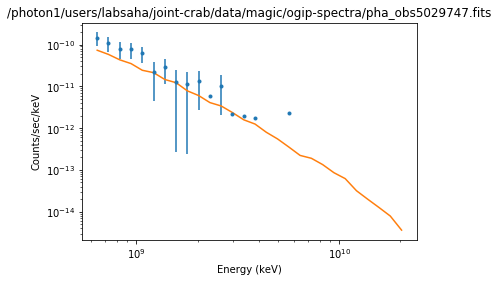

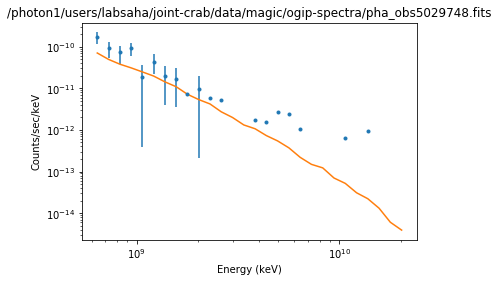

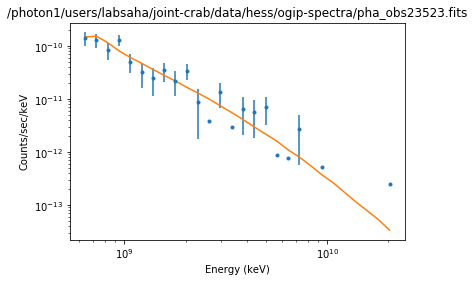

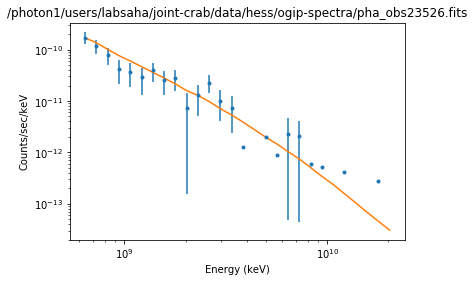

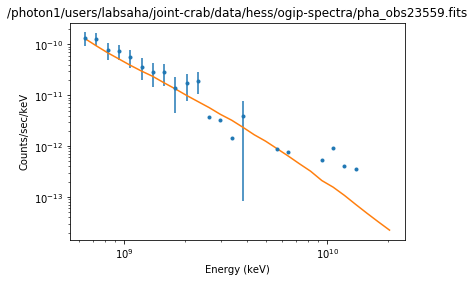

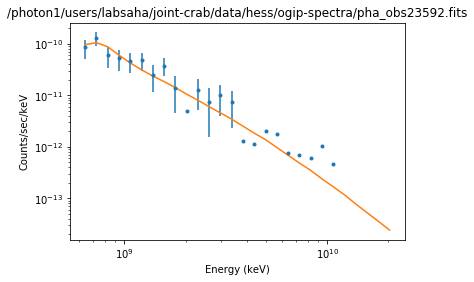

In [48]:
sh.get_data_plot_prefs()["xlog"] = True
sh.get_data_plot_prefs()["ylog"] = True
ds.plot_fit()

In [49]:
ds.conf()

p1.ampl lower bound:	-1.7939e-21
p1.ampl upper bound:	1.86509e-21
p1.c2 lower bound:	-0.290784
p1.c1 lower bound:	-0.163921
p1.c1 upper bound:	0.143856
p1.c2 upper bound:	0.387643
Datasets              = 7, 8, 9, 10, 11, 12
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   p1.c1             2.38749    -0.163921     0.143856
   p1.c2            0.364571    -0.290784     0.387643
   p1.ampl       2.61998e-20  -1.7939e-21  1.86509e-21
